# PH21B007
# Prasid

# Hydrogen Atom

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm                                
from numba import jit

To run this file numpy, pandas, matplotlib, tqdm, numba these libraries are needed.

If you are getting module not found kind of error then write ! pip install lib_name at the top of the file before importing the lbraries.

e.g. ! pip install numpy

In [2]:
# Setting Matplotlib plotting defaults
# Font
mpl.rcParams['font.family']           ='Serif'    # Setting Font family
mpl.rcParams['font.size']             = 18        # Setting Font size
# Figure
mpl.rcParams["figure.figsize"]        = (11, 7)   # Setting Figure size nearly equal to A4 sheet size
mpl.rcParams['savefig.dpi']           = 300       # Setting plot quality
mpl.rcParams['figure.dpi']            = 300       # High resolution for print quality
# Legend
mpl.rcParams["legend.fontsize"]       = 15        # Legend fontsize
mpl.rcParams["legend.title_fontsize"] = 15        # Legend fontsize
# Grid
mpl.rcParams["axes.grid"]             = True      # Setting grid to display
mpl.rcParams["grid.color"]            ='black'    # Setting grid color
mpl.rcParams['grid.linestyle']        ='--'       # Setting grid linestyle
mpl.rcParams['grid.linewidth']        = 0.5       # Setting grid linewidth
mpl.rcParams['grid.color']            ='gray'     # Setting grid color as gray
# xticks
mpl.rcParams["xtick.minor.visible"]   = True      # Setting visibility of xticks
mpl.rcParams['xtick.minor.width']     = 1.0       # Setting width of minor xticks
mpl.rcParams['xtick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['xtick.direction']       ='inout'    # Setting directions of xticks
mpl.rcParams['xtick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['xtick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['xtick.top']             = True      # Setting visibility of top minor xticks
# yticks
mpl.rcParams["ytick.minor.visible"]   = True      # Setting visibility of yticks
mpl.rcParams['ytick.minor.width']     = 1.0       # Setting width of minor yticks
mpl.rcParams['ytick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['ytick.direction']       ='inout'    # Setting directions of yticks
mpl.rcParams['ytick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['ytick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['ytick.right']           = True      # Setting visibility of top minor xticks

### Trial wavefunction and local energy

In [3]:
@jit  # Trial wavefunction with a as parameter
def psi_t(r, a):
    return a * r * np.exp(-a * r)

@jit # Local energy for above trial wavefunction
def local_energy(r, a):
    return -1/r - 0.5*a*(a - 2/r)

### Variational Monte Carlo

In [4]:
@jit # function to perform the monte carlo swip
def mc_swip(r, a, s):
    r_new = r + np.random.uniform(-s, s) # updating the position using uniform distribution 
    if r_new < 0:
        return r
    
    if np.random.random() < (psi_t(r_new, a) / psi_t(r, a))**2:  # accepting the new position using the metropolis algorithm 
        return r_new                                             # here probability is P(r_new)/ p(r_old) , p(r) = |psi(r)|^2
    else:
        return r

In [5]:
@jit  # function to do the monte carlo iterations and store the necessary quantities
def run_mc(a, n, s):
    r = 1.0         # initial position
    e1 = 0.0        # initial local energy
    e2 = 0.0        # initial local energy square
    
    for i in range(n):    # running the monte carlo iterations n time
        r = mc_swip(r, a, s)
        el = local_energy(r, a)
        e1 += el
        e2 += el**2
    
    e_mean = e1 / n             # taking the mean of local energy over all the n iterations
    e_var = e2 / n - e_mean**2      # variance of local energy
    
    return e_mean, e_var

In [6]:
a_val = np.arange(0.2, 1.61, 0.05) # a values
n = 100000                         # no. of monte carlo iterations
s = 4.0                            # step length

energy = []  # empty lists to store the values
var = []
    
for i in tqdm(a_val):    # iterating over all a values
    e, v = run_mc(i, n, s)
    energy.append(e)
    var.append(v)
    
e_exact = [(((i**2)/2) - i) for i in a_val] # exact local energy

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 10.54it/s]


The exact result is for α = 1 with an energy E = −1/2. We list the energy and the variance $σ^{2}$. The variable n, the number of Monte Carlo
samples, in this calculation we fixed n = 100000 and a step length of 4 Bohr radii was used in order to obtain
an acceptance of ≈ 50%.


### Plots

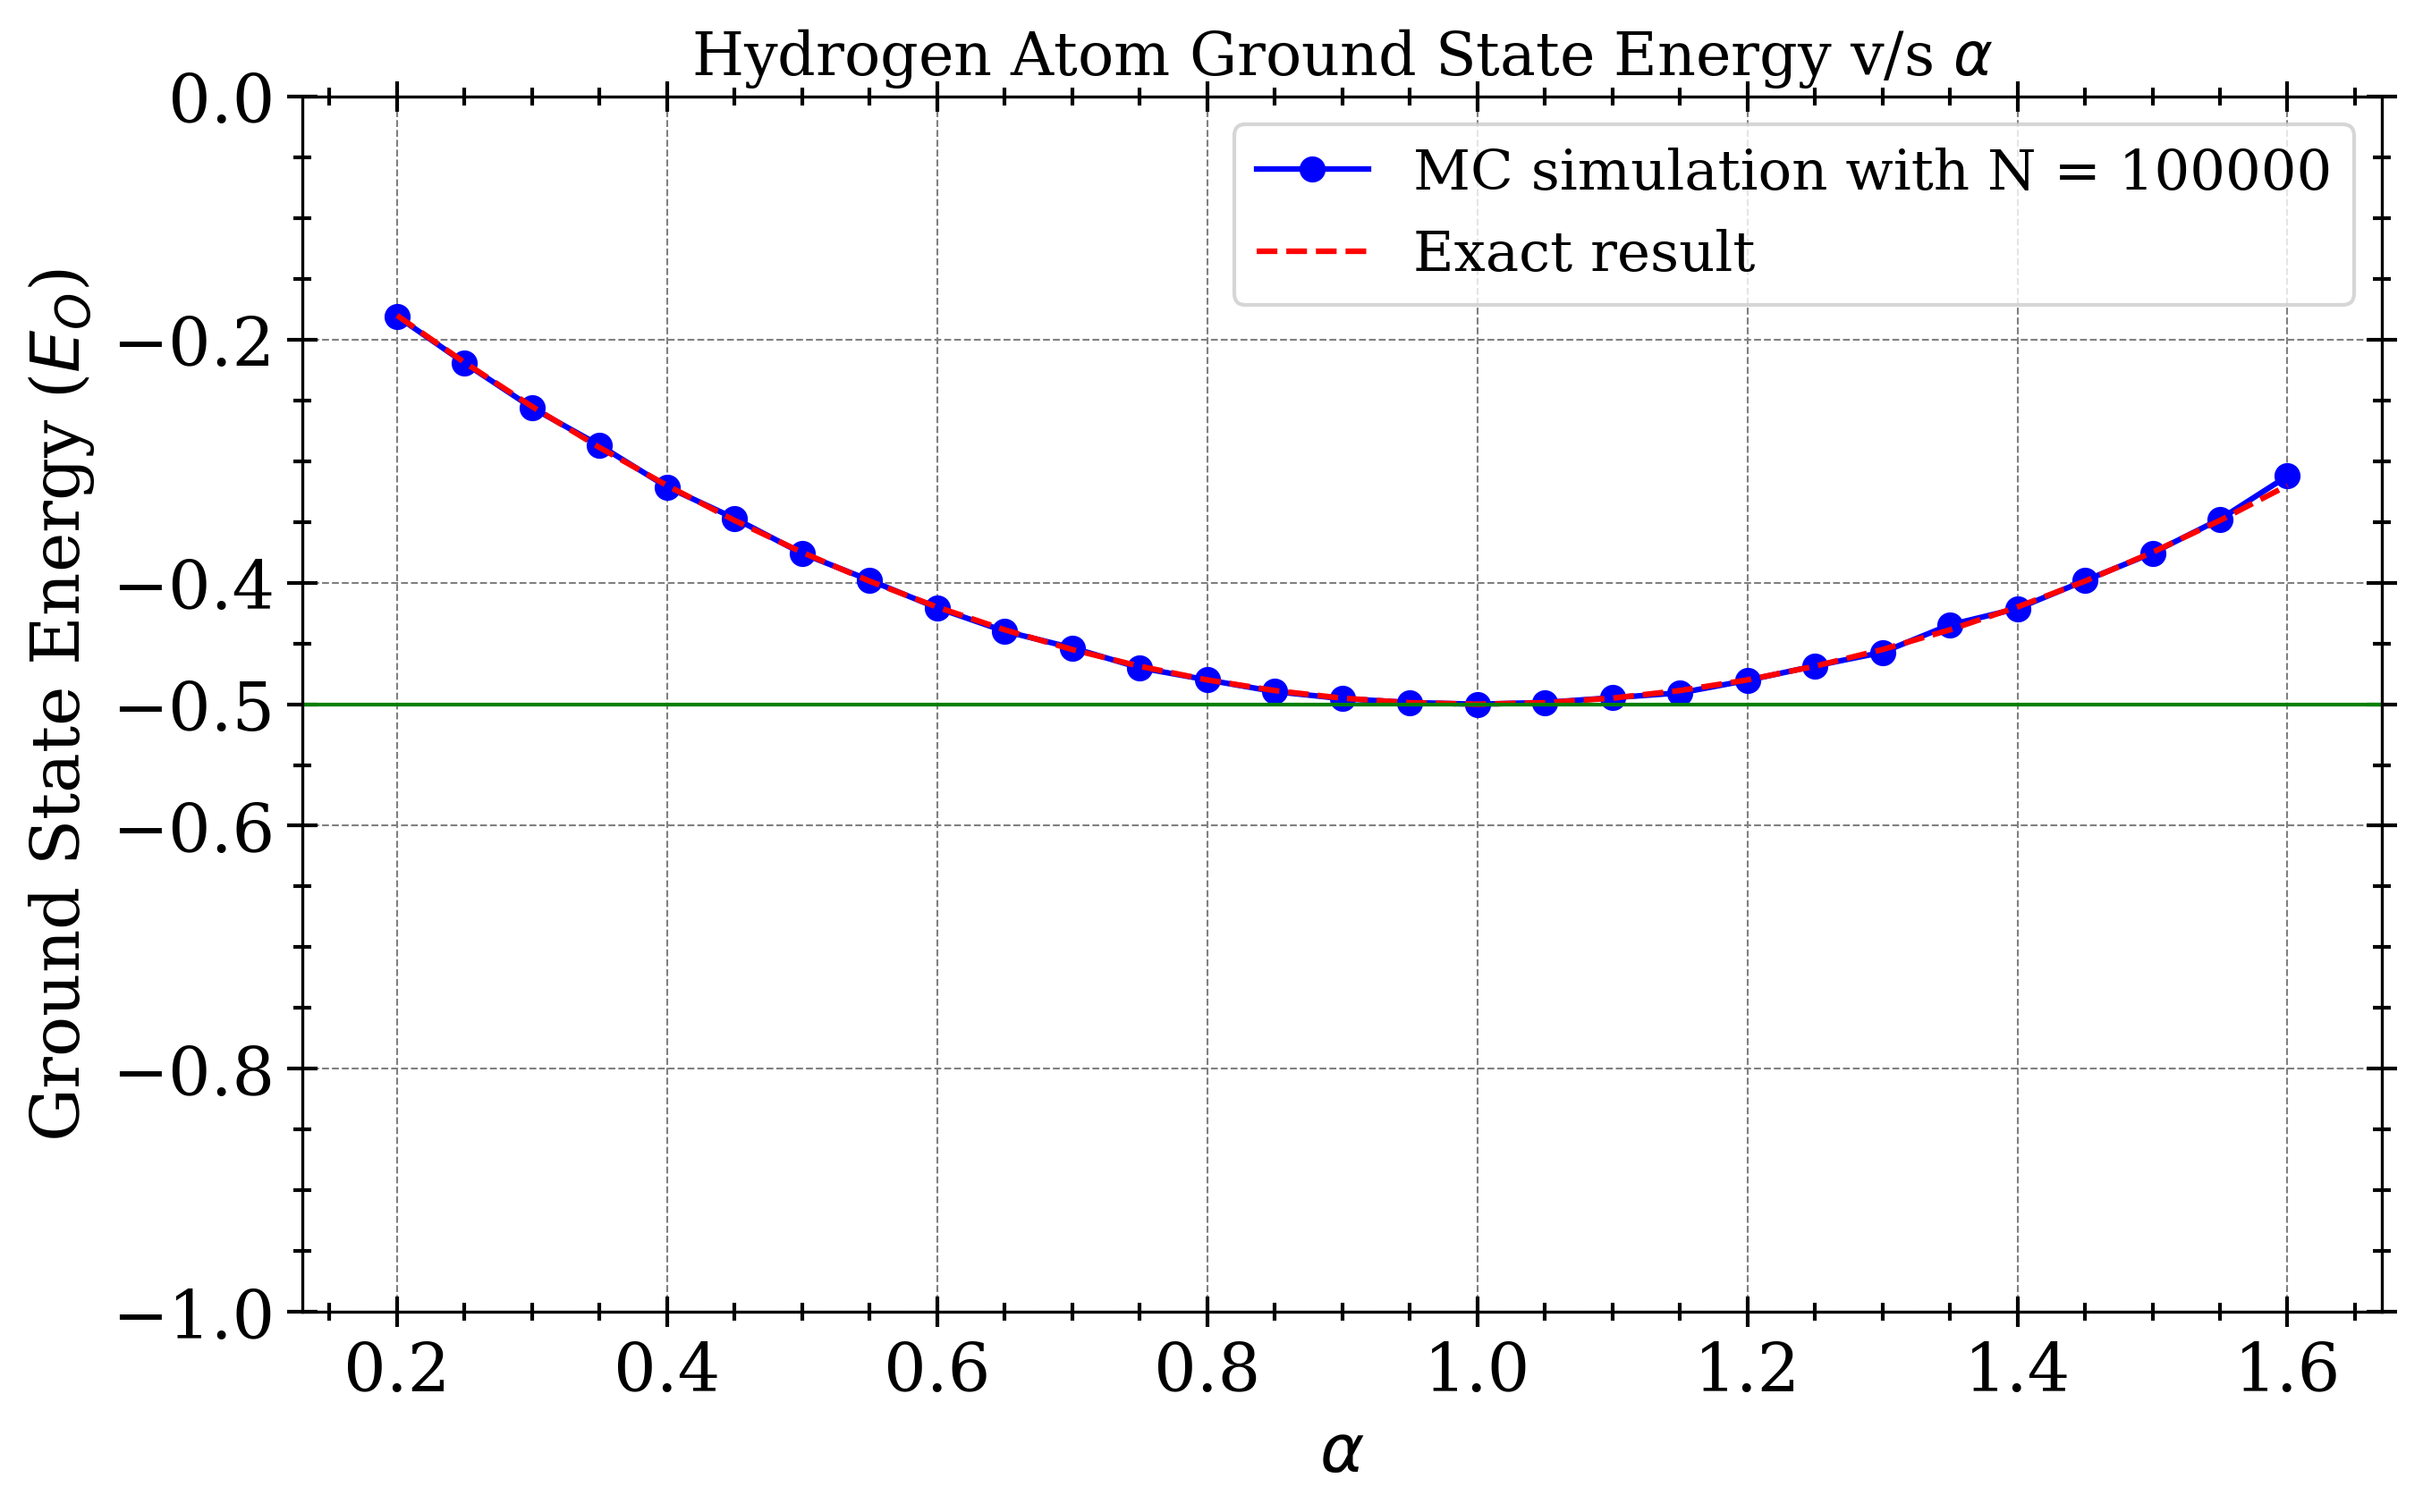

In [7]:
# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(a_val, energy, 'bo-', label = 'MC simulation with N = 100000')
plt.plot(a_val, e_exact, 'r--', label = 'Exact result')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'Ground State Energy ($E_{O}$)')
plt.title(r'Hydrogen Atom Ground State Energy v/s $\alpha$',fontsize=16)
plt.ylim(-1,0)
plt.axhline(y=-0.5, color='g', linestyle='-', linewidth=1)
plt.yticks(list(plt.yticks()[0]) + [-0.5])  # Update ticks
plt.legend()
plt.grid(True)
# plt.savefig('Hydrogen atom.png' ,orientation = 'portrait', dpi=500, bbox_inches='tight')
plt.show()

### Data

In [8]:
# making the dataframe contaning the mean energy and varivance for each value of alpha
df = pd.DataFrame({r'Parameter $\alpha$': a_val, r'Mean Energy $<H>$': energy, r' Variance $\sigma^{2}$': var})

df

,Parameter $\alpha$,Mean Energy $<H>$,Variance $\sigma^{2}$
0,0.20,-0.180708,0.025012
1,0.25,-0.219194,0.032653
2,0.30,-0.255996,0.050297
3,0.35,-0.286946,0.048049
4,0.40,-0.321184,0.050829
5,0.45,-0.347017,0.054045
6,0.50,-0.375906,0.080454
7,0.55,-0.397937,0.064260
8,0.60,-0.420713,0.056241
9,0.65,-0.439941,0.051845


In [9]:
# Convert DataFrame to LaTeX table string
latex_table = df.to_latex(
    index=False,           # Exclude index column
    header=True,           # Include column headers
    float_format="%.6f",   # Format float values
    caption="Sample Table", # Add caption
    label="tab:sample_table", # Add label for referencing
    column_format="lcc"    # Align columns (left, center, center)
)

# Print the LaTeX table string
print(latex_table)

\begin{table}
\centering
\caption{Sample Table}
\label{tab:sample_table}
\begin{tabular}{lcc}
\toprule
 Parameter \$\textbackslash alpha\$ &  Mean Energy \$<H>\$ &   Variance \$\textbackslash sigma\textasciicircum \{2\}\$ \\
\midrule
           0.200000 &          -0.180708 &                0.025012 \\
           0.250000 &          -0.219194 &                0.032653 \\
           0.300000 &          -0.255996 &                0.050297 \\
           0.350000 &          -0.286946 &                0.048049 \\
           0.400000 &          -0.321184 &                0.050829 \\
           0.450000 &          -0.347017 &                0.054045 \\
           0.500000 &          -0.375906 &                0.080454 \\
           0.550000 &          -0.397937 &                0.064260 \\
           0.600000 &          -0.420713 &                0.056241 \\
           0.650000 &          -0.439941 &                0.051845 \\
           0.700000 &          -0.453586 &                0.040326